In [98]:
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [ ]:
####################################################
"""
(1) Analyze the ETF returns without any risk adjustments. Describe the summary statistics of returns. Comment on what you observe.
"""
####################################################

[*********************100%%**********************]  1 of 1 completed


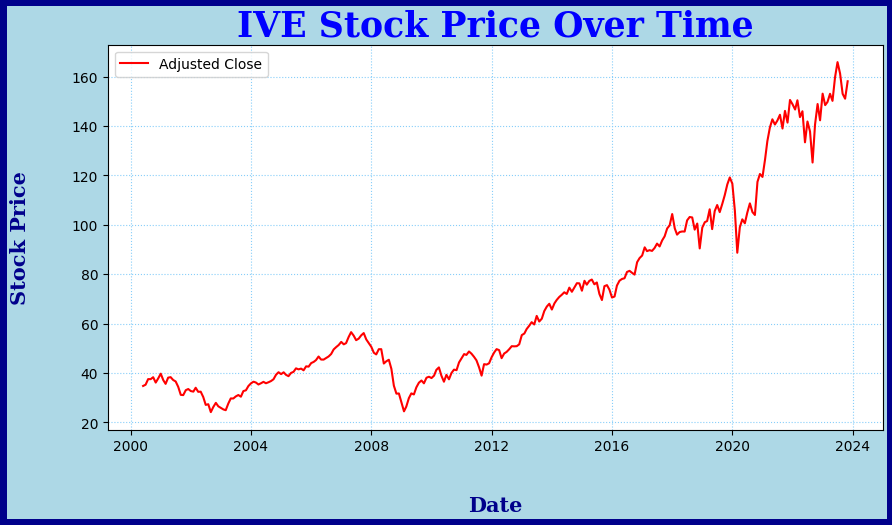

In [100]:
def plot_price(ticker, start_date):
    # Download stock data from Yahoo Finance
    stock_data = yf.download(ticker, start=start_date, interval='1mo')

    # Resample data to monthly frequency
    stock_data['Returns'] = stock_data['Adj Close'].pct_change().dropna()

    # Define the figure with custom style
    plt.figure(figsize=(10, 5), facecolor='lightblue', edgecolor='darkblue', linewidth=8)
    plt.plot(stock_data['Adj Close'], label='Adjusted Close', color='red')

    # Define font styles
    font1 = {'family':'serif', 'color':'blue', 'size':25}
    font2 = {'family':'serif', 'color':'darkblue', 'size':15}

    # Set title and labels with the specified font dictionaries
    plt.title(f'{ticker} Stock Price Over Time', fontdict=font1, fontweight='bold')
    plt.xlabel('Date', fontdict=font2, fontweight='bold', labelpad=30)
    plt.ylabel('Stock Price', fontdict=font2, fontweight='bold', labelpad=30)

    # Show legend and grid
    plt.legend()
    plt.grid(linestyle='dotted', color='lightskyblue')
    plt.show()

# Example usage
plot_price("IVE", "2000-01-01")

[*********************100%%**********************]  1 of 1 completed


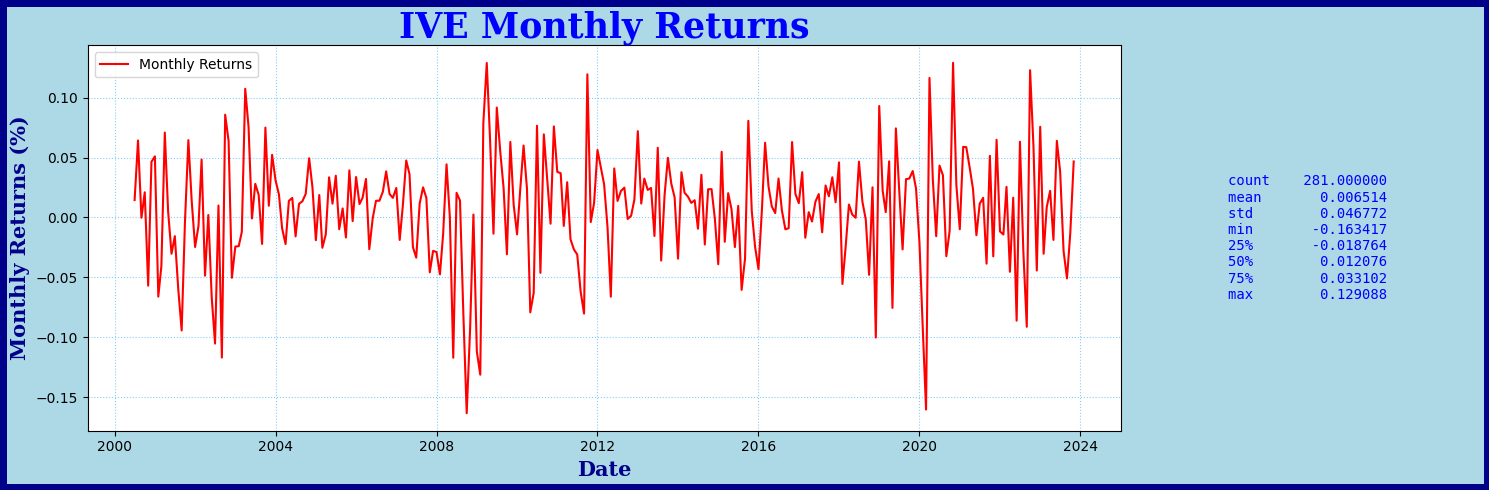

In [101]:
def calculate_monthly_returns(ticker, start_date):
    # Download stock data from Yahoo Finance
    stock_data = yf.download(ticker, start=start_date, interval='1mo')

    # Calculate monthly returns
    stock_data['Returns'] = stock_data['Adj Close'].pct_change().dropna()

    # Summary statistics
    summary_stats = stock_data['Returns'].describe()

    return stock_data['Returns'], summary_stats

def plot_monthly_returns_with_custom_style_and_summary(ticker, start_date):
    # Calculate monthly returns and get summary statistics
    monthly_returns, summary_stats = calculate_monthly_returns(ticker, start_date)

    # Define font styles
    font1 = {'family':'serif', 'color':'blue', 'size':25}
    font2 = {'family':'serif', 'color':'darkblue', 'size':15}

    # Create a figure with custom GridSpec layout
    fig = plt.figure(figsize=(15, 5), facecolor='lightblue',edgecolor='darkblue', linewidth=8)
    gs = GridSpec(1, 2, width_ratios=[3, 1])  # Adjust the width ratio here

    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])

    # Plot settings for monthly returns
    ax1.plot(monthly_returns.index, monthly_returns, label='Monthly Returns', color='red')
    ax1.set_title(f'{ticker} Monthly Returns', fontdict=font1, fontweight='bold')
    ax1.set_xlabel('Date', fontdict=font2, fontweight='bold')
    ax1.set_ylabel('Monthly Returns (%)', fontdict=font2, fontweight='bold')
    ax1.legend()
    ax1.grid(linestyle='dotted', color='lightskyblue')

    # Display summary statistics
    ax2.axis('off')  # Turn off the axis
    summary_text = summary_stats.to_string()
    ax2.text(0.5, 0.5, summary_text, ha="center", va="center", fontsize=10, family='monospace', color='blue')

    plt.tight_layout()
    plt.show()

# Plot the monthly returns with the customized settings for the ticker "IVE"
plot_monthly_returns_with_custom_style_and_summary("IVE", "2000-01-01")


In [ ]:
"""

The summary statistics for the iShares S&P 500 Value ETF (IVE) monthly returns without any risk adjustments are as follows:

Count: 281 months of return data are available for analysis.
Mean: The average monthly return is approximately 0.65%, indicating a positive average return over the period analyzed.
Standard Deviation: The standard deviation is about 4.68%, which suggests a moderate level of volatility or risk in the returns.
Minimum: The lowest monthly return observed is -16.34%, showing the potential for significant short-term losses.
25th Percentile: 25% of the monthly returns are less than -1.88%, indicating that returns are negative in at least one quarter of the months.
Median: The median monthly return is 1.21%, which is the middle value separating the higher half from the lower half of the data sample.
75th Percentile: 75% of the monthly returns are less than 3.31%, showing that most of the returns are modest and not extremely high.
Maximum: The highest monthly return observed is 12.91%, reflecting the potential for significant short-term gains.

From these statistics, we can infer that the ETF has provided a positive return on average, with a relatively moderate level of volatility.
The range between the minimum and maximum returns suggests that while the ETF can have periods of significant gains, it can also experience substantial drops, which is typical behavior for equity investments.
The positive mean return indicates that the investment has generally grown over the period analyzed, but investors should be mindful of the potential for volatility and negative returns in any given month.​


"""

In [ ]:
####################################################
"""
(2) In the spirit of seasonality, calculate the average return for each calendar month. Also,
– Identify the month with the maximum average return and test if it statistically different than other months.
– Identify the month with the minimum average return and test if it statistically different than other months.
"""
####################################################

In [102]:
import yfinance as yf
import pandas as pd
from datetime import date
import plotly.express as px

def Seasonality_Dynamic_Interactive(ticker, start=None, end=None):
    if start is None:
        start = "2020-01-01"
    if end is None:
        end = date.today()

    price = yf.download(ticker, start, end)
    df = pd.DataFrame({'return': price['Close'].pct_change().fillna(0)})

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df = df[df.index >= df[df.index.month == 1].index[0]]
    df = df[df.index <= df[df.index.month == 12].index[-1]]

    # Monthly Data Summary
    monthly = {}
    for year in df.index.year.unique():
        yeardf = df[df.index.year == year]
        monthly[year] = yeardf.groupby(yeardf.index.month).sum() * 100

    data = pd.concat(monthly, axis=1)
    data.columns = [col[0] for col in data.columns]
    data.index = months
    summary = pd.DataFrame(data.mean(axis=1))
    summary.columns = ['Return %']
    summary = summary.reset_index().rename(columns={'index': 'Month'})

    # Create interactive Plotly graph with light blue theme and dark blue titles, axis labels
    fig = px.line(summary, x='Month', y='Return %', markers=True, title=f'Seasonal Chart: {ticker}',)
    fig.update_traces(line=dict(color='blue'), marker=dict(color='red', size=10))
    fig.update_layout(
        plot_bgcolor='lightblue',
        paper_bgcolor='lightblue',
        title_font=dict(color='darkblue', size=25),
        xaxis=dict(title='Month', title_font=dict(color='darkblue', size=18)),
        yaxis=dict(title='Return %', title_font=dict(color='darkblue', size=18))
    )
    fig.show()

    return data.T

# Example usage
Seasonality_Dynamic_Interactive("IVE", "2000-01-01")

[*********************100%%**********************]  1 of 1 completed


,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
2001,4.601621,-6.710044,-3.791564,6.880164,0.607163,-3.000272,-1.797107,-6.046959,-9.535325,-0.195424,5.875995,1.489321
2002,-2.714052,-0.530595,4.826556,-5.168785,0.363475,-6.752230,-10.604169,1.526406,-12.011817,8.480473,6.494503,-5.019354
2003,-2.739984,-2.257756,-0.898528,9.917503,7.439097,0.017559,2.469760,1.935473,-2.147446,6.830256,1.021913,5.146125
2004,2.185794,1.929360,-0.814142,-2.573786,1.471332,1.676275,-1.950590,1.188534,1.384960,1.576846,4.871207,2.528998
2005,-2.372695,1.895384,-2.517639,-2.087811,3.343232,1.170471,3.091400,-0.954578,0.788333,-2.015907,3.892163,-0.282844
2006,2.849872,1.148942,1.659771,2.707106,-2.597940,0.054786,0.978675,1.412250,2.152401,3.290811,1.967332,1.652364
2007,1.895266,-1.807575,1.038251,4.144512,3.582604,-2.423410,-3.796231,1.430583,2.581935,1.144511,-4.348377,-2.682744
2008,-3.250717,-4.673193,-1.054642,3.798350,0.150614,-12.247303,1.744756,1.641983,-7.376711,-16.003296,-7.810944,1.404354
2009,-12.264243,-13.488186,8.888572,11.634860,6.716550,-1.178626,8.297409,5.545405,2.544651,-3.468213,6.219417,1.133961
2010,-1.997449,2.691254,5.873604,2.038789,-7.843217,-6.228904,7.047385,-4.592674,6.821554,2.633718,-0.437044,7.379796


In [ ]:
"""
We observe that the periods yielding the highest returns typically occur in April (2.41%), July (1.24%), and November (2.48%), with November marking the peak.
Conversely, the most significant downturns are evident in June (-1.45%) and September (-1.61%), with September representing the lowest point.
Consequently, in updating our simple regression model from the previous project, we will incorporate these findings by treating the index as a variable within the function.
"""

In [103]:
# We need to add the additional library statsmodels at this point
import statsmodels.formula.api as smf

In [104]:
def simple_regression(ticker, month_index, start_date):
    stock_data = yf.download(ticker, start=start_date, interval='1mo')
    stock_data['Returns'] = stock_data['Adj Close'].pct_change()

    # Create a dummy variable for January
    stock_data['Selected_Month'] = (stock_data.index.month == month_index).astype(int)

    # Run regression
    model = smf.ols("Returns ~ Selected_Month", data = stock_data.dropna()).fit()

    # Print regression summary
    print(model.summary())

In [105]:
# check with November

simple_regression("IVE", 10, "2000-01-01")

[*********************100%%**********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.340
Date:                Sat, 11 Nov 2023   Prob (F-statistic):              0.127
Time:                        10:26:13   Log-Likelihood:                 463.51
No. Observations:                 281   AIC:                            -923.0
Df Residuals:                     279   BIC:                            -915.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [ ]:
"""

YORUM EKLENECEK OLS ÇIKTILARINA !!!!!

"""

In [106]:
# check with September

simple_regression("IVW", 9, "2000-01-01")

[*********************100%%**********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     8.654
Date:                Sat, 11 Nov 2023   Prob (F-statistic):            0.00354
Time:                        10:26:16   Log-Likelihood:                 467.10
No. Observations:                 281   AIC:                            -930.2
Df Residuals:                     279   BIC:                            -922.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [ ]:
"""

YORUM EKLENECEK OLS ÇIKTILARINA !!!!!!

"""

In [ ]:
####################################################
"""
(3) Using the risk factors estimate risk-adjusted alphas and comment on whether the ETF creates any value. Also,
– Comment on the risk factors you identified the ETF is exposed to. In other words, which risks does this ETF take?
– Explain how ETF returns would be affected from risk factors you identified above.
"""
####################################################

In [114]:
def test_factorsdata(etf_ticker, start):
    # Download ETF data and read factors data
    etf_data = yf.download(etf_ticker, start, interval='1mo')['Adj Close']
    factors_data = pd.read_csv("factors_data.csv", index_col='date', parse_dates=True, date_parser=lambda x: pd.to_datetime(x, format='%Y%m'))

    # Clean and merge data
    factors_data = factors_data.dropna(axis=1, how='all')
    merged_data = pd.merge(factors_data, etf_data, left_index=True, right_index=True).dropna()

    # Calculate returns and excess returns
    merged_data['Returns'] = merged_data['Adj Close'].pct_change() * 100
    merged_data['Excess'] = merged_data['Returns'] - merged_data['RF']
    merged_data = merged_data.drop(['Adj Close', 'year', 'month'], axis=1).dropna()

    # Fit the OLS model
    model = smf.ols('Excess ~ MktRF + SMB + HML + RMW + CMA + MOM', data=merged_data).fit()
    print(merged_data)
    print(model.summary())

In [115]:
test_factorsdata("IVE", "2000-01-01")

[*********************100%%**********************]  1 of 1 completed
            MktRF   SMB    HML    RMW   CMA   MOM    RF   Returns    Excess
2000-07-01  -2.51 -1.03   8.31   5.83  2.94 -0.05  0.48  1.456596  0.976596
2000-08-01   7.03 -1.03  -1.39  -3.22  1.10  5.73  0.50  6.429509  5.929509
2000-09-01  -5.45  0.19   7.17   2.56  5.53  1.97  0.51 -0.024796 -0.534796
2000-10-01  -2.76 -2.65   5.71   9.61  3.80 -4.48  0.56  2.101603  1.541603
2000-11-01 -10.72 -0.58  12.30  13.07  8.43 -2.32  0.51 -5.693396 -6.203396
...           ...   ...    ...    ...   ...   ...   ...       ...       ...
2023-03-01   2.51 -6.94  -8.85   2.24 -2.37 -2.49  0.36  0.850607  0.490607
2023-04-01   0.61 -2.56  -0.04   2.42  2.86  1.63  0.35  2.221413  1.871413
2023-05-01   0.35 -0.38  -7.72  -1.81 -7.22 -0.63  0.36 -1.871883 -2.231883
2023-06-01   6.46  1.34  -0.26   2.18 -1.62 -2.39  0.40  6.396040  5.996040
2023-07-01   3.21  2.86   4.13  -0.56  0.62 -4.06  0.45  3.812603  3.362603

[277 rows x 9 colu

In [ ]:
"""

YORUM EKLENECEK OLS ÇIKTILARINA !!!!!!

"""

In [ ]:
####################################################
"""
(4) Using the industry portfolio returns estimate the ETF’s exposure to various industries. Comment on your findings. Also,
– Identify the largest industry exposure of the ETF and test whether this exposure is similar before and after 2019.
"""
####################################################